# Lending Club Case Study

### Problems: I have lending loan data of consumer finance company which are providing various type of loan to urban customers.  When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
#### 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
#### 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.
#### I will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.
#### When a person applies for a loan, there are two types of decisions that could be taken by the company:
##### 1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
######    1.1. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
######    1.2. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
######    1.3. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
##### 2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Load libs and dataset

In [62]:
#import the libs and load the csv file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import math

loandf = pd.read_csv("loan.csv", dtype = {'next_pymnt_d': object})
loandf.shape

(39717, 111)

## Data Cleaning

#### Dropping Columns

In [2]:
irrelevantfields = ["delinq_2yrs","earliest_cr_line",
"inq_last_6mths",
"mths_since_last_delinq",
"mths_since_last_record",
"open_acc",
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"initial_list_status",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"next_pymnt_d",
"last_credit_pull_d",
"collections_12_mths_ex_med",
"mths_since_last_major_derog",
"policy_code",
"application_type",
"annual_inc_joint",
"dti_joint",
"verification_status_joint",
"acc_now_delinq",
"tot_coll_amt",
"tot_cur_bal",
"open_acc_6m",
"open_il_6m",
"open_il_12m",
"open_il_24m",
"mths_since_rcnt_il",
"total_bal_il",
"il_util",
"open_rv_12m",
"open_rv_24m",
"max_bal_bc",
"all_util",
"total_rev_hi_lim",
"inq_fi",
"total_cu_tl",
"inq_last_12m",
"acc_open_past_24mths",
"avg_cur_bal",
"bc_open_to_buy",
"bc_util",
"chargeoff_within_12_mths",
"delinq_amnt",
"mo_sin_old_il_acct",
"mo_sin_old_rev_tl_op",
"mo_sin_rcnt_rev_tl_op",
"mo_sin_rcnt_tl",
"mort_acc",
"mths_since_recent_bc",
"mths_since_recent_bc_dlq",
"mths_since_recent_inq",
"mths_since_recent_revol_delinq",
"num_accts_ever_120_pd",
"num_actv_bc_tl",
"num_actv_rev_tl",
"num_bc_sats",
"num_bc_tl",
"num_il_tl",
"num_op_rev_tl",
"num_rev_accts",
"num_rev_tl_bal_gt_0",
"num_sats",
"num_tl_120dpd_2m",
"num_tl_30dpd",
"num_tl_90g_dpd_24m",
"num_tl_op_past_12m",
"pct_tl_nvr_dlq",
"percent_bc_gt_75",
"pub_rec_bankruptcies",
"tax_liens",
"tot_hi_cred_lim",
"total_bal_ex_mort",
"total_bc_limit",
"total_il_high_credit_limit",
"title",
"zip_code",
"pymnt_plan",
"url",
"desc",
"issue_d",
"sub_grade",
"funded_amnt",
"member_id",
"id"]
loandf.drop(labels=irrelevantfields, axis=1, inplace=True )


In [63]:
# Shape Of Required Columns
loandf.shape

(39717, 111)

## Checking Misssing Values Of "Emp_Length" Attribute

In [64]:
loandf["emp_length"].isnull().value_counts()

False    38642
True      1075
Name: emp_length, dtype: int64

### Observation :- 

#### 1. Field emp_length values is of type string , as it is considered a numerical column , so needs to change the data type  to int

In [65]:
# String replace method
def replace_str(col_name, str1, str2):
    return loandf[col_name].str.replace(str1, str2)

In [19]:
# Data type conversion method
def data_type_conversion(col_name, datatype):
    return loandf[col_name].astype(datatype)

In [20]:
#relace 'Years' into numeric values and also replace 10+ to 10
loandf.emp_length = replace_str('emp_length', 'years', '')
loandf.emp_length = replace_str('emp_length', 'year', '')
loandf.emp_length = replace_str('emp_length', '+', '')
loandf.emp_length = replace_str('emp_length', '< 1', '0')
loandf.emp_length.unique()


C:\Users\PIYUSH~1\AppData\Local\Temp/ipykernel_16828/2121456611.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  return loandf[col_name].str.replace(str1, str2)


array(['10 ', '0 ', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

#### 2. As we have 1075 null values , that needs to be imputed since its low number to drop these values, so imputing with median.

In [21]:
# Filling NAN Values
medianvalues = loandf['emp_length'].median()
loandf.emp_length = loandf['emp_length'].fillna(medianvalues)
loandf.emp_length = data_type_conversion('emp_length', 'int32')#loandf.emp_length.astype('int32')
loandf["emp_length"].isnull().value_counts()
loandf.emp_length.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

## Missing Values Dropped

In [22]:
# Check the null value
loandf = loandf[loandf['emp_title'].notna()]
loandf['emp_title'].isnull().value_counts()

False    37258
Name: emp_title, dtype: int64

## Conversion to numerical type

In [23]:
# Convert terms into int
loandf.term = replace_str('term', 'months', '')
loandf.term =  data_type_conversion('term', 'int32') #loandf.term.astype('int32')
loandf.int_rate = replace_str('int_rate', '%', '')
loandf.int_rate = data_type_conversion('int_rate', 'float')  #loandf.int_rate.astype('float')

In [95]:
loandf.head(10)

loan_amnt  funded_amnt_inv  term  int_rate  installment grade  \
1        2500           2500.0    60     15.27        59.83     C   
3       10000          10000.0    36     13.49       339.31     C   
4        3000           3000.0    60     12.69        67.79     B   
5        5000           5000.0    36      7.90       156.46     A   
6        7000           7000.0    60     15.96       170.08     C   
7        3000           3000.0    36     18.64       109.43     E   
9        5375           5350.0    60     12.69       121.45     B   
10       6500           6500.0    60     14.65       153.45     C   
11      12000          12000.0    36     12.69       402.54     B   
12       9000           9000.0    36     13.49       305.38     C   

                              emp_title  emp_length home_ownership  \
1                                 Ryder           0           RENT   
3                   AIR RESOURCES BOARD          10           RENT   
4              University Medical Group           1           RENT   
5                  Veolia Transportaton           3           RENT   
6             Southern Star Photography           8           RENT   
7                       MKC Accounting            9           RENT   
9                             Starbucks           0           RENT   
10                Southwest Rural metro           5            OWN   
11                                 UCLA          10            OWN   
12  Va. Dept of Conservation/Recreation           0           RENT   

    annual_inc verification_status  loan_status             purpose  \
1      30000.0     Source Verified  Charged Off                 car   
3      49200.0     Source Verified   Fully Paid               other   
4      80000.0     Source Verified      Current               other   
5      36000.0     Source Verified   Fully Paid             wedding   
6      47004.0        Not Verified   Fully Paid  debt_consolidation   
7      48000.0     Source Verified   Fully Paid                 car   
9      15000.0            Verified  Charged Off               other   
10     72000.0        Not Verified   Fully Paid  debt_consolidation   
11     75000.0     Source Verified   Fully Paid  debt_consolidation   
12     30000.0     Source Verified  Charged Off  debt_consolidation   

   addr_state    dti  
1          GA   1.00  
3          CA  20.00  
4          OR  17.94  
5          AZ  11.20  
6          NC  23.51  
7          CA   5.35  
9          TX  18.08  
10         AZ  16.12  
11         CA  10.78  
12         VA  10.08

### Sanity Checks 

In [96]:
# Funded amount should not be zero
loandf = loandf[loandf.funded_amnt_inv > 0]
loandf.shape

(37140, 15)

## Assumption :-
### 1. Approved Loan Amount > Installment
### 2. Approved Amount > 0

In [97]:
# Funded amount should be less than request amount
loandf = loandf[loandf.installment < loandf.funded_amnt_inv]
loandf = loandf[loandf.funded_amnt_inv > 0]
loandf.shape

(37058, 15)

# Binning

In [98]:
#Creating the int_rate_range binning 
bins = [0,5,10,15,20,25]
slot = ['0-5', '5-10', '10-15', '15-20','20-25']
loandf['int_rate_range'] = pd.cut(loandf['int_rate'], bins, labels=slot)
loandf.head(5)

loan_amnt  funded_amnt_inv  term  int_rate  installment grade  \
1       2500           2500.0    60     15.27        59.83     C   
3      10000          10000.0    36     13.49       339.31     C   
4       3000           3000.0    60     12.69        67.79     B   
5       5000           5000.0    36      7.90       156.46     A   
6       7000           7000.0    60     15.96       170.08     C   

                   emp_title  emp_length home_ownership  annual_inc  \
1                      Ryder           0           RENT     30000.0   
3        AIR RESOURCES BOARD          10           RENT     49200.0   
4   University Medical Group           1           RENT     80000.0   
5       Veolia Transportaton           3           RENT     36000.0   
6  Southern Star Photography           8           RENT     47004.0   

  verification_status  loan_status             purpose addr_state    dti  \
1     Source Verified  Charged Off                 car         GA   1.00   
3     Source Verified   Fully Paid               other         CA  20.00   
4     Source Verified      Current               other         OR  17.94   
5     Source Verified   Fully Paid             wedding         AZ  11.20   
6        Not Verified   Fully Paid  debt_consolidation         NC  23.51   

  int_rate_range  
1          15-20  
3          10-15  
4          10-15  
5           5-10  
6          15-20

In [66]:
#Creating the funded_amnt_range binning 
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loandf['funded_amnt_range'] = pd.cut(loandf['funded_amnt_inv'], bins, labels=slot)
loandf.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_op_past_12m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  pct_tl_nvr_dlq percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
0            NaN              NaN                   0.0       0.0   
1            NaN              NaN                   0.0       0.0   
2            NaN              NaN                   0.0       0.0   
3            NaN              NaN                   0.0       0.0   
4            NaN              NaN                   0.0       0.0   

  tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0             NaN               NaN            NaN                        NaN   
1             NaN               NaN            NaN                        NaN   
2             NaN               NaN            NaN                        NaN   
3             NaN               NaN            NaN                        NaN   
4             NaN               NaN            NaN                        NaN   

  funded_amnt_range  
0            0-5000  
1            0-5000  
2            0-5000  
3        5000-10000  
4            0-5000  

[5 rows x 112 columns]

In [100]:
#Creating the annual_income_range binning 
bins = [0,1000000,2000000,3000000,4000000,5000000,6000000,7000000]
slot = ['0-1000000', '1000000-2000000', '2000000-3000000', '3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000']
loandf['annual_income_range'] = pd.cut(loandf['annual_inc'], bins, labels=slot)
loandf.head(5)

loan_amnt  funded_amnt_inv  term  int_rate  installment grade  \
1       2500           2500.0    60     15.27        59.83     C   
3      10000          10000.0    36     13.49       339.31     C   
4       3000           3000.0    60     12.69        67.79     B   
5       5000           5000.0    36      7.90       156.46     A   
6       7000           7000.0    60     15.96       170.08     C   

                   emp_title  emp_length home_ownership  annual_inc  \
1                      Ryder           0           RENT     30000.0   
3        AIR RESOURCES BOARD          10           RENT     49200.0   
4   University Medical Group           1           RENT     80000.0   
5       Veolia Transportaton           3           RENT     36000.0   
6  Southern Star Photography           8           RENT     47004.0   

  verification_status  loan_status             purpose addr_state    dti  \
1     Source Verified  Charged Off                 car         GA   1.00   
3     Source Verified   Fully Paid               other         CA  20.00   
4     Source Verified      Current               other         OR  17.94   
5     Source Verified   Fully Paid             wedding         AZ  11.20   
6        Not Verified   Fully Paid  debt_consolidation         NC  23.51   

  int_rate_range funded_amnt_range annual_income_range  
1          15-20            0-5000           0-1000000  
3          10-15        5000-10000           0-1000000  
4          10-15            0-5000           0-1000000  
5           5-10            0-5000           0-1000000  
6          15-20        5000-10000           0-1000000

## Deciding Target Dataframes

In [101]:
#Extract the target_fully_paid and  target_charged_off columns
target_fully_paid=loandf[loandf.loan_status == "Fully Paid"]
target_charged_off=loandf[loandf.loan_status == "Charged Off"]

# Univariate Analysis For Categories

## Continous Variables

In [67]:
# creating the boxplot method
def box_plot(df):
    data = []
    for index, col in enumerate(df):
        data.append(
        go.Box(y= df.iloc[:,index], name = col ))
        
    layout = go.Layout(
    yaxis = dict(title = "Frequency", zeroline = False), boxmode = 'group')
    
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)

### 1. Loan Amount

In [68]:
#Generate Loan Amount boxplot
box_plot(pd.DataFrame(loandf["loan_amnt"]))
# loandf["loan_amnt"].describe()

### 2. Funded Amount

In [69]:
box_plot(pd.DataFrame(loandf["funded_amnt_inv"]))
# loandf["funded_amnt_inv"].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

### 3. Interest rate

In [57]:
box_plot(pd.DataFrame(loandf["int_rate"]))
# loandf["int_rate"].describe()

### 4. Annual Income

In [70]:
box_plot(pd.DataFrame(loandf["annual_inc"]))
# loandf["annual_inc"].describe()

In [72]:
#Find the outliers and get the deciding factor of extracting values
outlier_coorection = loandf["annual_inc"].quantile(0.995)
loandf = loandf[loandf["annual_inc"] < outlier_coorection]
loandf["annual_inc"].describe()


count     39494.000000
mean      66378.257586
std       37413.212327
min        4000.000000
25%       40000.000000
50%       58776.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

### 4.1 Annual Income

In [73]:
box_plot(pd.DataFrame(loandf["annual_inc"]))
# loandf["annual_inc"].describe()

#### Observation :- 
1. We can see that annual income lies between 40k ( Q1) to ~82k (Q3) 

## Categorical Variables

### 1. Home OwnerShip

In [93]:
#bar plot
def categorical_barplots(col_name, ylabel='frequency'):
    plt.rcParams["figure.figsize"] = [8,6]
    plt.rcParams["figure.autolayout"] = True
    fig, ax = plt.subplots()
    loandf[col_name].value_counts().plot(ax = ax, kind='bar', xlabel=col_name, ylabel=ylabel)
    plt.show()

# Pie plot
def categorical_pieplots(col_name, ylabel='frequency'):
    plt.rcParams["figure.figsize"] = [8,6]
    plt.rcParams["figure.autolayout"] = True
    
    
    fig, ax = plt.subplots()
    loandf[col_name].value_counts().plot(ax = ax, kind='pie', xlabel=col_name, ylabel=ylabel,  autopct='%1.1f%%')
    plt.show()

#### 1. Loan Status

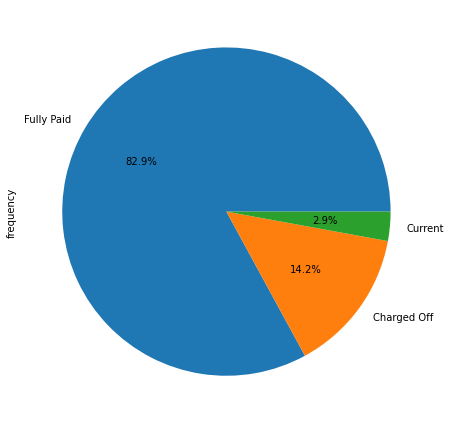

In [92]:
categorical_pieplots('loan_status')

#### 2. Home Ownership 

##### 2.1 Home Ownership

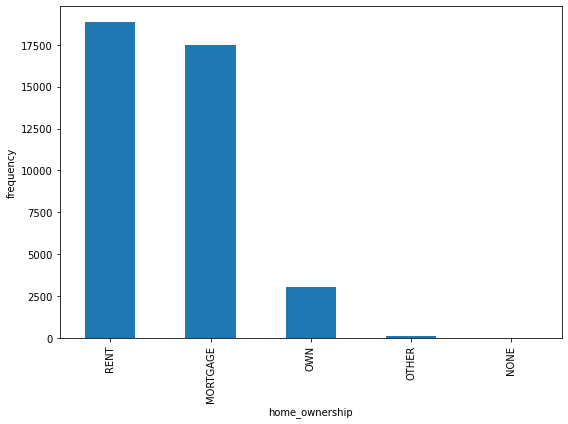

count     39494
unique        5
top        RENT
freq      18848
Name: home_ownership, dtype: object

In [95]:
categorical_barplots('home_ownership')
# loandf['home_ownership'].describe()

#### 2.2 Employee Length

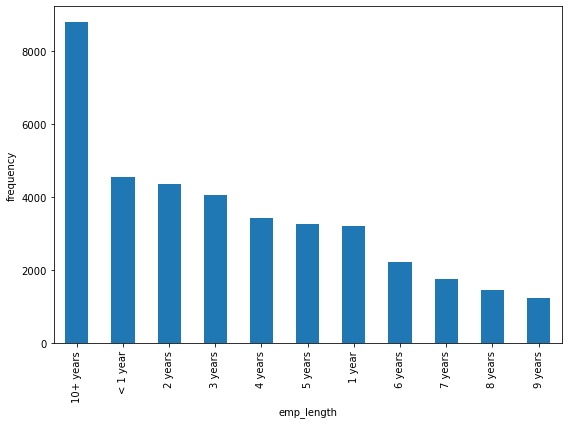

count         38422
unique           11
top       10+ years
freq           8796
Name: emp_length, dtype: object

In [97]:
categorical_barplots('emp_length')
# loandf['emp_length'].describe()

#### 2.3 Varification Status

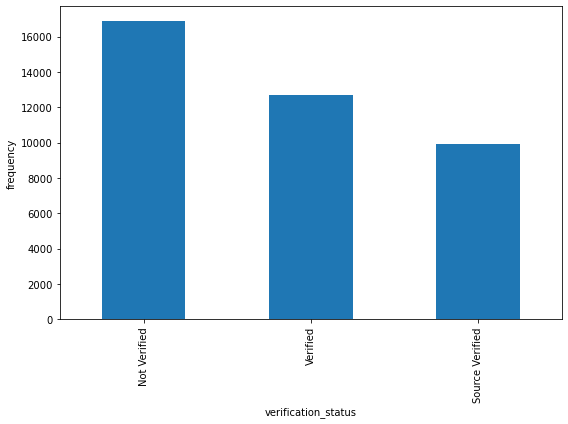

count            39494
unique               3
top       Not Verified
freq             16860
Name: verification_status, dtype: object

In [100]:
categorical_barplots('verification_status')
# loandf['verification_status'].describe()

### Grades

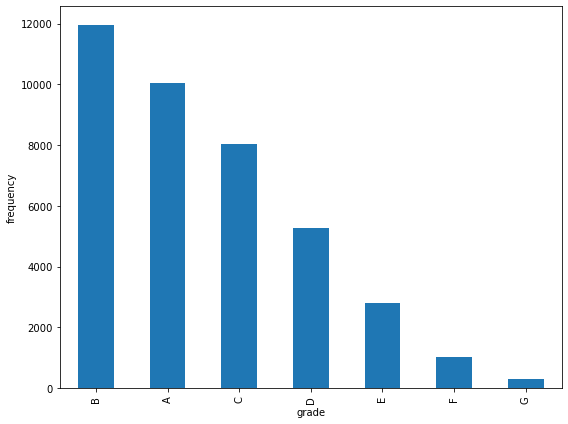

count     39494
unique        7
top           B
freq      11967
Name: grade, dtype: object

In [101]:
categorical_barplots('grade')
# loandf['grade'].describe()


## MultiVariate Analysis

#### 1. Get the correlaion

In [103]:
cor_col = ["loan_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc", "dti"]
loan_cor = loandf.filter(cor_col, axis=1)
corr = loan_cor.corr(method="pearson")
corr

loan_amnt  funded_amnt_inv  installment  annual_inc       dti
loan_amnt         1.000000         0.940030     0.930014    0.417388  0.071792
funded_amnt_inv   0.940030         1.000000     0.904626    0.395652  0.079490
installment       0.930014         0.904626     1.000000    0.416689  0.059603
annual_inc        0.417388         0.395652     0.416689    1.000000 -0.118025
dti               0.071792         0.079490     0.059603   -0.118025  1.000000

#### 2. Create the Heatmap identify the correlation

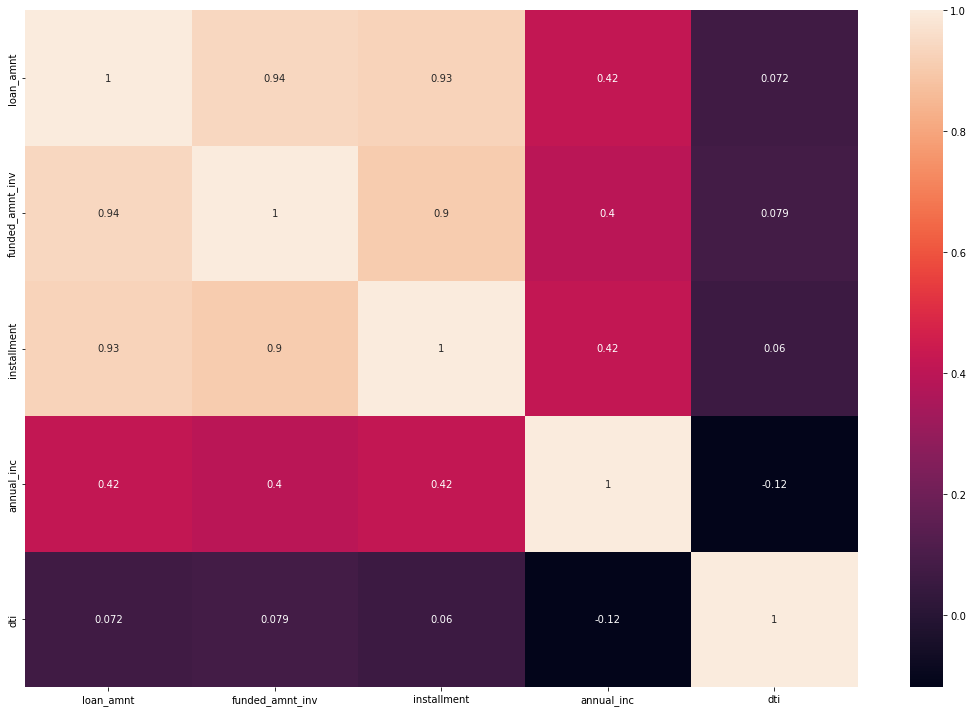

In [108]:
plt.subplots(figsize = (15,10))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True)
plt.show()

#### As per finding Loan Amount is highly correlated with Funded Amount Inv

### 1. Purpose Of Loan VS Loan Amount per loan status

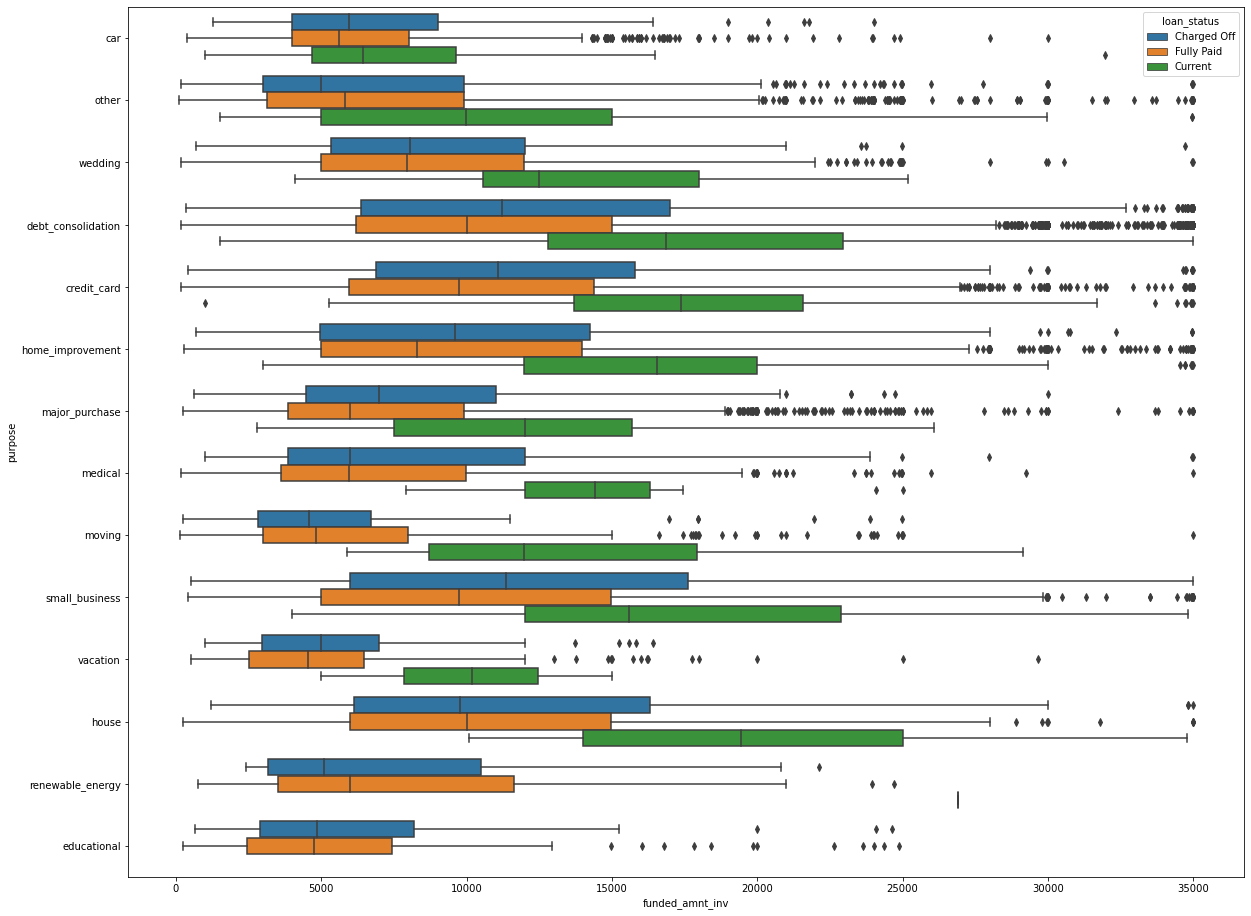

In [27]:
plt.figure(figsize = (20, 16))
sns.boxplot(data=loandf, x="funded_amnt_inv", y="purpose", hue="loan_status")
plt.show()

### Observation: 
#### 1. Small Business: We can not see any clear indication of  outliers for Small Business. So Bank should do more analysis while giving the loan.
#### 2. We can see that Others and Major Purchase categories have lots of outliers which can be contribute more losses.

### Emp Length VS Loan Status

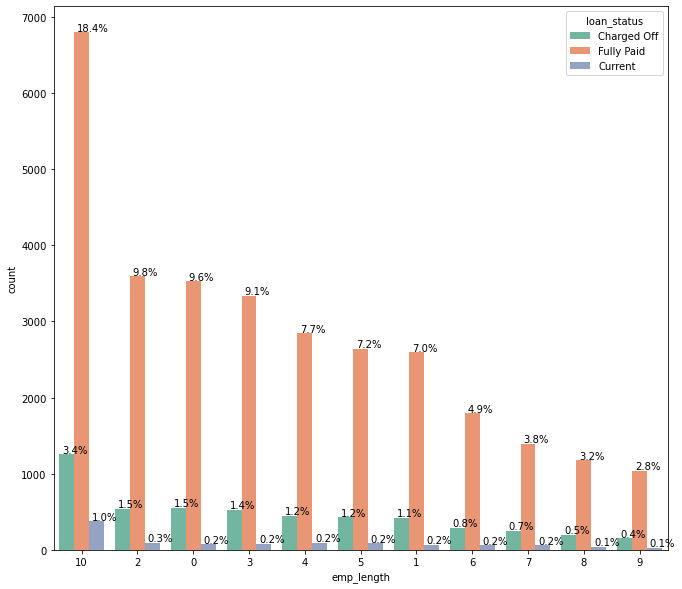

In [28]:
def plot_bar_chart(plot,col,hue):
    hue_col = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(plot[col].unique())
    fig.set_size_inches(width, 10)
    ax = sns.countplot(data = loanplot, x=col, order=plot[col].value_counts().index, hue = hue, palette = "Set2")
    for p in ax.patches:
        temp_height = p.get_height()
        if math.isnan(temp_height):
            temp_height = 0.01
        ax.annotate('{:1.1f}%'.format((temp_height*100)/float(len(loanplot))), (p.get_x()+0.05, temp_height+20 ))
    plt.show()
loanplot = loandf[["emp_length", "loan_status"]]
plot_bar_chart(loanplot, "emp_length", "loan_status" )

### Observation 
1. Loan taken in maximum number whose employee length is >= 10 Years. 18 % Loan has been taken.
2. Loan taken in minimum number whose employee length is 1 year as compared to others[0 to 5 years] and has low defaulting rate.

### Employee Length V/S Funded Amount For Loan Purpose


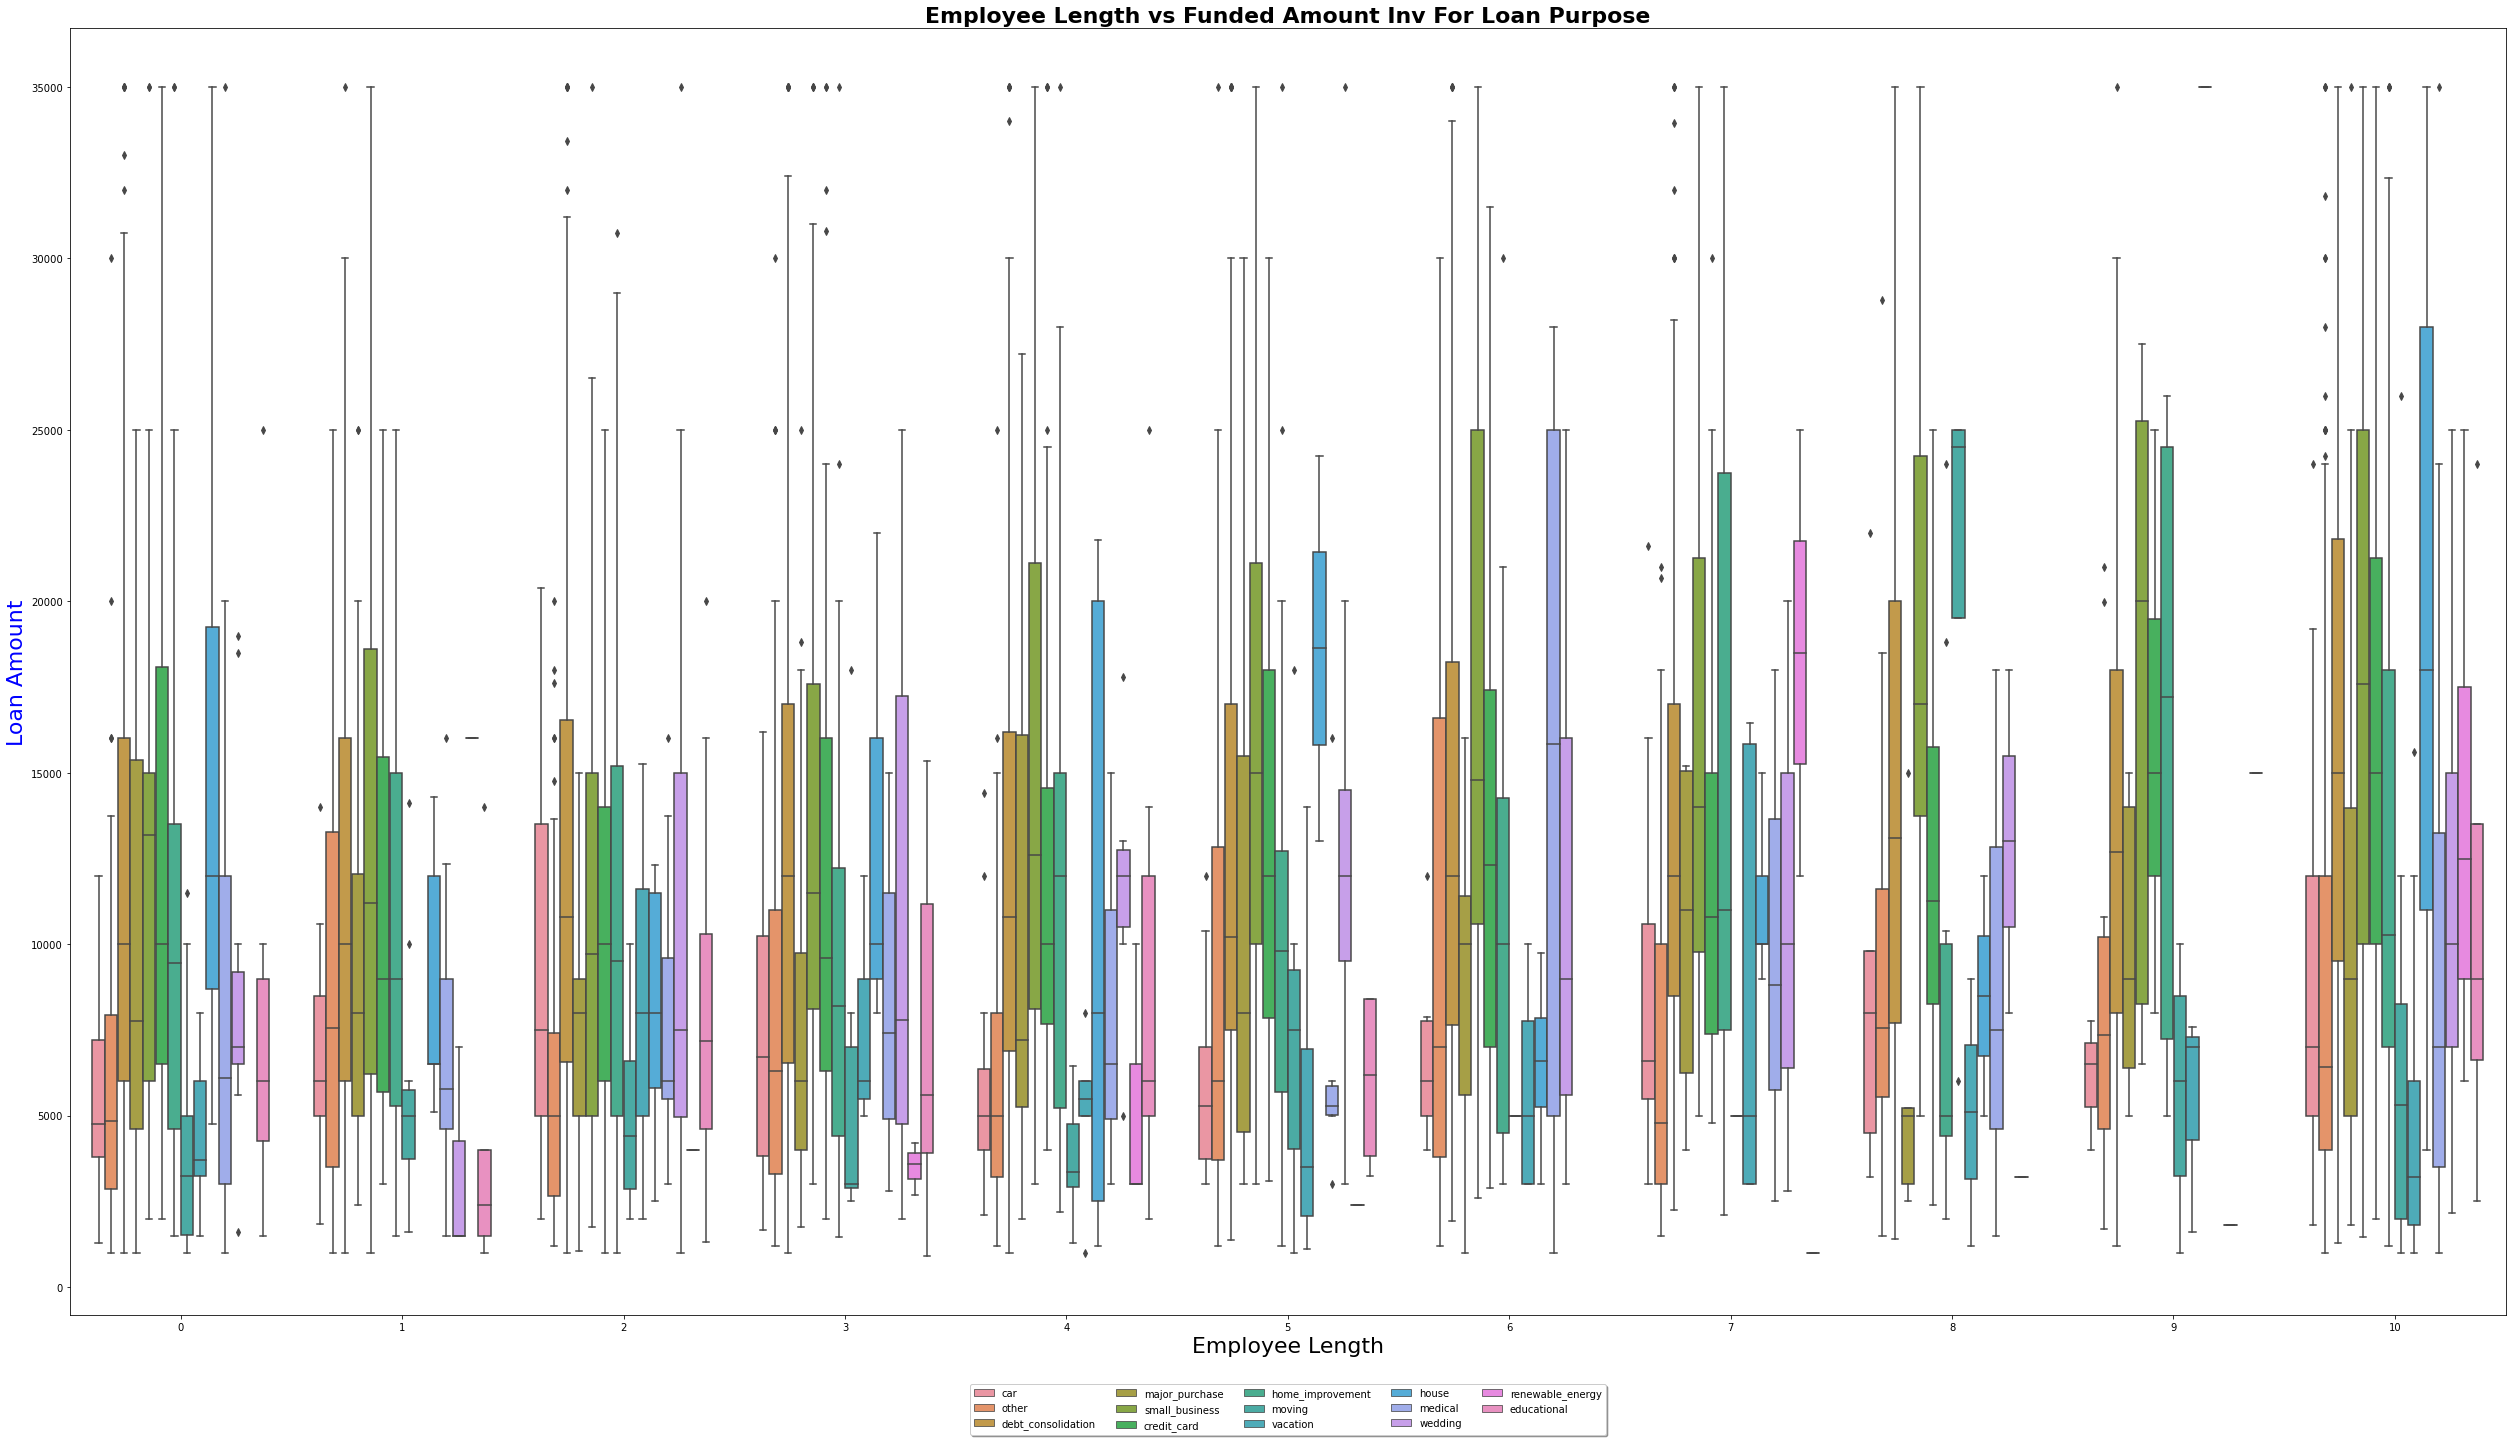

In [46]:
loanstatus = loandf.pivot_table(index=["loan_status","purpose","emp_length"], values = "funded_amnt_inv", aggfunc = ("count")).reset_index()
loanstatus = loandf.loc[loandf["loan_status"] == "Charged Off"]
ax = plt.figure(figsize = (35, 20))
ax = sns.boxplot(x="emp_length", y="loan_amnt", hue="purpose", data=loanstatus)
ax.set_title("Employee Length vs Funded Amount Inv For Loan Purpose", fontsize=22, weight = "bold")
ax.set_xlabel("Employee Length", fontsize=22)
ax.set_ylabel("Loan Amount", color = 'b', fontsize=22)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()

### Observation 
1. Loan Purpose >= 10 years, emp length took highest loan amount for home.
2. Loan Purpose 6 years, emp length took highest loan amount for medical.
3. Loan Purpose 9 years, emp length did not take loan for educational, renewable energy, wedding, medical, house.

## Driving Variables Contributing to Loan Default
Objective :- 

Identifying probability of risky applicants through variables that are responsible for triggering defaulters

Below Variables might trigger "Charged-Off":
1. employment length -----> Categorical Variable
2. grades ------> Categorical Variable
3. purpose ------> Categorical Variable
4. loan_amnt -----> Categorical Variable ( After Conversion )
5. int_rate -----> Categorical Variable ( After Conversion )
6. annual_inc -----> Categorical Variable ( After Conversion )

### Employee Length & Default Chances

In [38]:
def calculate_defaulter(dataframe,column) :
    def_tab = pd.crosstab(dataframe[column], dataframe['loan_status'],margins=True)
    def_tab['All'] = def_tab['Charged Off'] + def_tab['Current'] + def_tab['Fully Paid']
    def_tab['Loan Default Probability'] = round((def_tab['Charged Off']/def_tab['All']),3)
    def_tab = def_tab[0:-1]
    return def_tab


def plot_bar_line_chart(dataframe,column,stacked=False):
    plot = calculate_defaulter(dataframe,column)
    display(plot)
    linePlot = plot[['Loan Default Probability']] 
    line = linePlot.plot(figsize=(20,8), marker='o',color = 'r',lw=2)
    line.set_title(dataframe[column].name.title()+' vs Loan Default Probability',fontsize=20,weight="bold")
    line.set_xlabel(dataframe[column].name.title(),fontsize=14)
    line.set_ylabel('Loan Default Probability',color = 'r',fontsize=20)
    barPlot =  plot.iloc[:,0:3] 
    bar = barPlot.plot(kind='bar',ax = line,rot=1,secondary_y=True,stacked=stacked)
    bar.set_ylabel('Number of Applicants',color = 'r',fontsize=20)
    plt.show()



loan_status  Charged Off  Current  Fully Paid   All  Loan Default Probability
emp_length                                                                   
0                    562       74        3565  4201                     0.134
1                    435       67        2632  3134                     0.139
2                    547       95        3631  4273                     0.128
3                    534       81        3367  3982                     0.134
4                    459       92        2862  3413                     0.134
5                    436       86        2655  3177                     0.137
6                    296       59        1803  2158                     0.137
7                    254       59        1409  1722                     0.148
8                    198       44        1193  1435                     0.138
9                    152       31        1045  1228                     0.124
10                  1270      379        6886  8535                     0.149

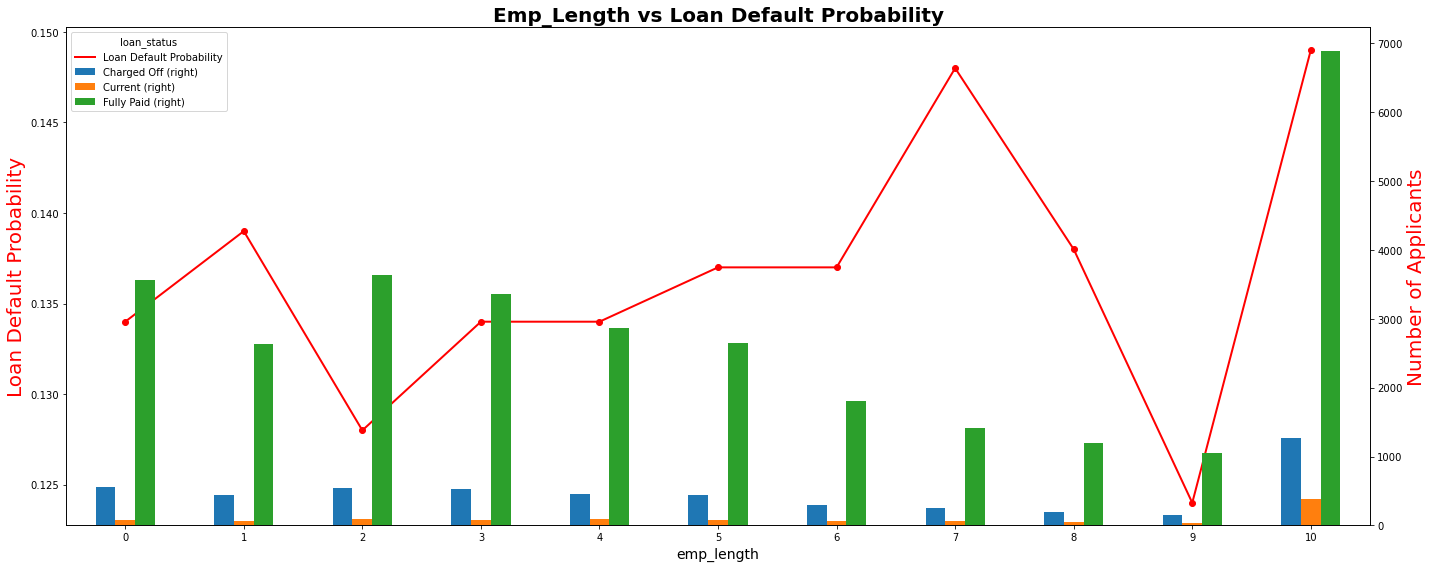

In [37]:
plot_bar_line_chart(loandf,"emp_length")

### Observation:
#### 1. Less Defaulterrate when your employee length is 9 years
#### 2. Higher Defaulter rate for employee length >= 10 years

### Grades with default chances

loan_status  Charged Off  Current  Fully Paid    All  Loan Default Probability
grade                                                                         
A                    526       35        8692   9253                     0.057
B                   1273      318        9582  11173                     0.114
C                   1205      248        6082   7535                     0.160
D                   1011      210        3740   4961                     0.204
E                    662      168        1835   2665                     0.248
F                    290       67         620    977                     0.297
G                     95       16         184    295                     0.322

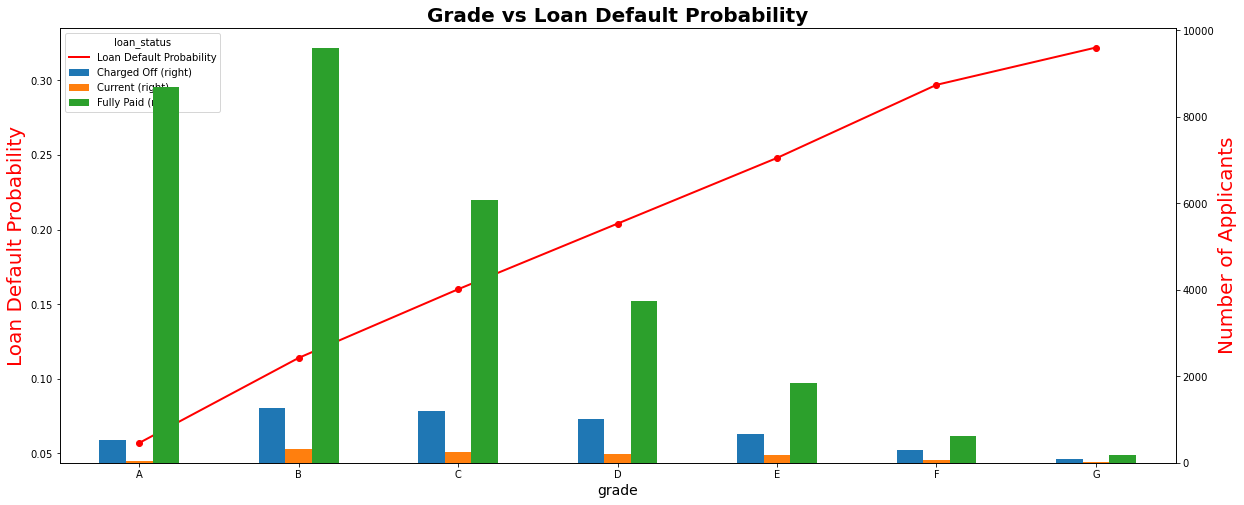

In [32]:
plot_bar_line_chart(loandf,"grade")

### Observation :-
1. From grade A to G , Loan Probability Defaulter increasing

### Purpose With Default Chances

loan_status         Charged Off  Current  Fully Paid    All  \
purpose                                                       
car                         152       48        1257   1457   
credit_card                 480      100        4203   4783   
debt_consolidation         2563      559       14544  17666   
educational                  48        0         239    287   
home_improvement            300       89        2307   2696   
house                        55       13         275    343   
major_purchase              194       35        1788   2017   
medical                      96       12         530    638   
moving                       82        6         446    534   
other                       565      112        2981   3658   
renewable_energy             16        1          69     86   
small_business              372       63        1019   1454   
vacation                     49        4         288    341   
wedding                      90       20         789    899   

loan_status         Loan Default Probability  
purpose                                       
car                                    0.104  
credit_card                            0.100  
debt_consolidation                     0.145  
educational                            0.167  
home_improvement                       0.111  
house                                  0.160  
major_purchase                         0.096  
medical                                0.150  
moving                                 0.154  
other                                  0.154  
renewable_energy                       0.186  
small_business                         0.256  
vacation                               0.144  
wedding                                0.100

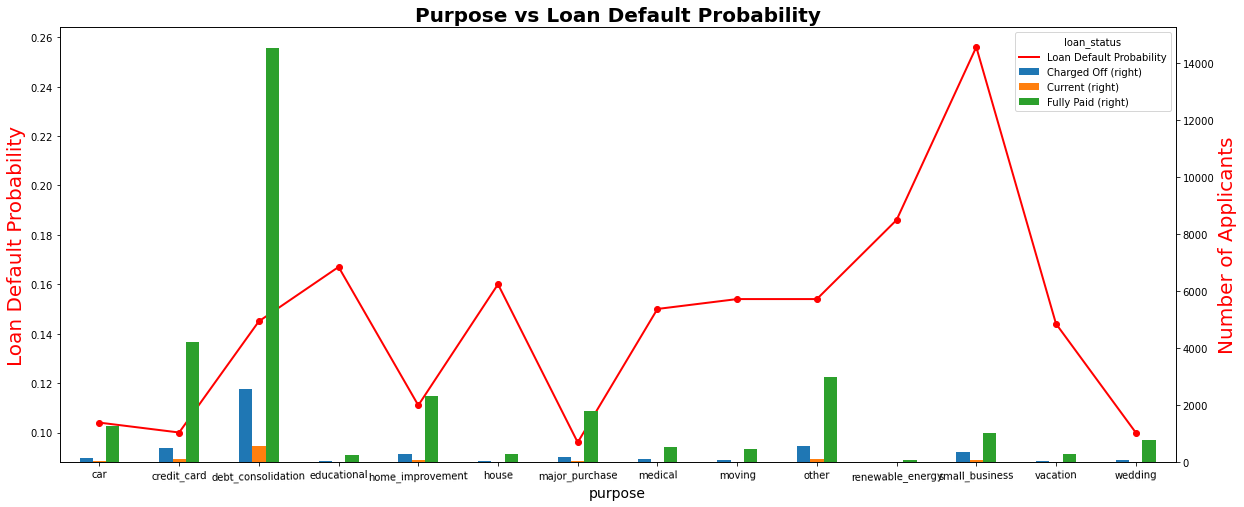

In [33]:
plot_bar_line_chart(loandf,"purpose")

### Observation :-
1. We can see that , most of the  loan default probability is seen for small_business,so bank should be extra careful while approving the loan for such businesses
2. Minimum defaulter rate showing for Major Purchase

### BINNING AS WE FOUND OUTLIERS EARLIER IN ANNUAL INCOME

In [40]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loandf['annual_inc_range'] = pd.cut(loandf['annual_inc'], bins, labels=slot)
loandf.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
1  1077430    1314167       2500         2500           2500.0    60   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   
5  1075269    1311441       5000         5000           5000.0    36   
6  1069639    1304742       7000         7000           7000.0    60   

   int_rate  installment grade sub_grade  ... num_tl_op_past_12m  \
1     15.27        59.83     C        C4  ...                NaN   
3     13.49       339.31     C        C1  ...                NaN   
4     12.69        67.79     B        B5  ...                NaN   
5      7.90       156.46     A        A4  ...                NaN   
6     15.96       170.08     C        C5  ...                NaN   

   pct_tl_nvr_dlq percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
1             NaN              NaN                   0.0       0.0   
3             NaN              NaN                   0.0       0.0   
4             NaN              NaN                   0.0       0.0   
5             NaN              NaN                   0.0       0.0   
6             NaN              NaN                   0.0       0.0   

  tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
1             NaN               NaN            NaN                        NaN   
3             NaN               NaN            NaN                        NaN   
4             NaN               NaN            NaN                        NaN   
5             NaN               NaN            NaN                        NaN   
6             NaN               NaN            NaN                        NaN   

  annual_inc_range  
1      25000-50000  
3      25000-50000  
4     75000-100000  
5      25000-50000  
6      25000-50000  

[5 rows x 112 columns]

### Annual Income Range chance to be defaulter 

loan_status       Charged Off  Current  Fully Paid    All  \
annual_inc_range                                            
0-25000                   395       15        1754   2164   
25000-50000              1939      303       10049  12291   
50000-75000              1577      339        9571  11487   
75000-100000              685      214        5106   6005   
100000 and above          546      196        4555   5297   

loan_status       Loan Default Probability  
annual_inc_range                            
0-25000                              0.183  
25000-50000                          0.158  
50000-75000                          0.137  
75000-100000                         0.114  
100000 and above                     0.103

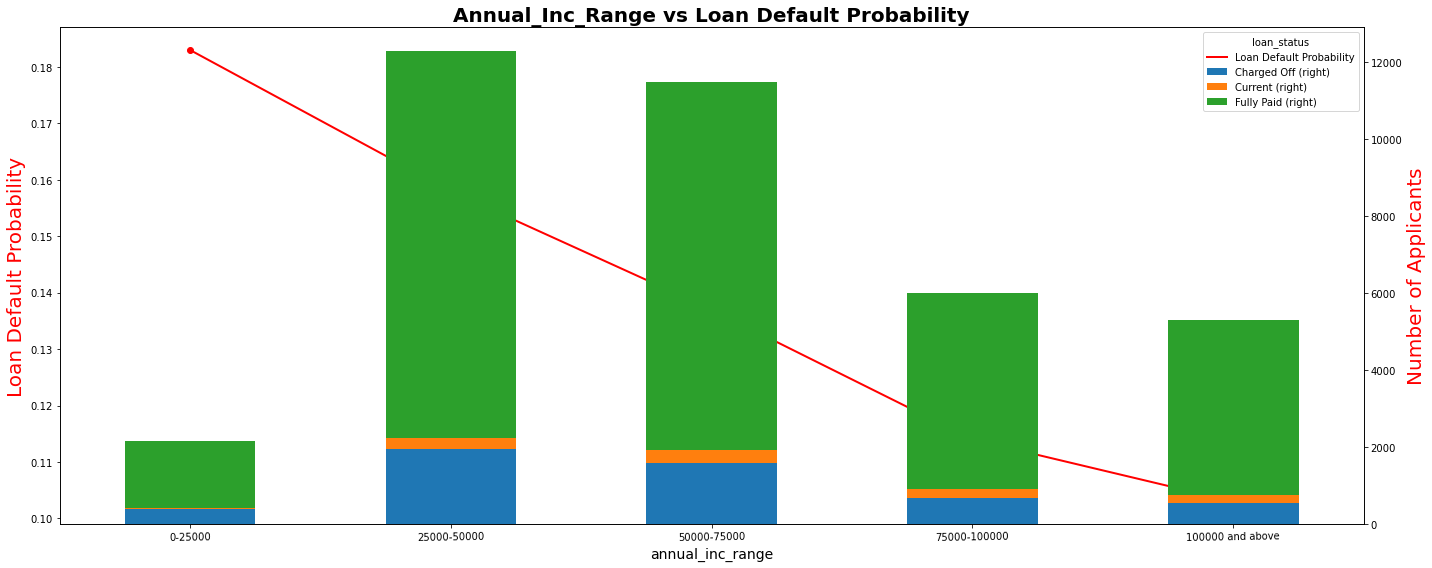

In [41]:
plot_bar_line_chart(loandf,"annual_inc_range",stacked=True)

#### Observation :- 
We can can see, as annual income is increasing , probabality of being defaulter is also increasing , reaching up to 19%

### Interest Range and chance to be defaulter

loan_status     Charged Off  Current  Fully Paid    All  \
int_rate_range                                            
5-10                    714       69       10589  11372   
10-15                  2422      491       14573  17486   
15-20                  1654      407        5130   7191   
20-25                   272       95         443    810   

loan_status     Loan Default Probability  
int_rate_range                            
5-10                               0.063  
10-15                              0.139  
15-20                              0.230  
20-25                              0.336

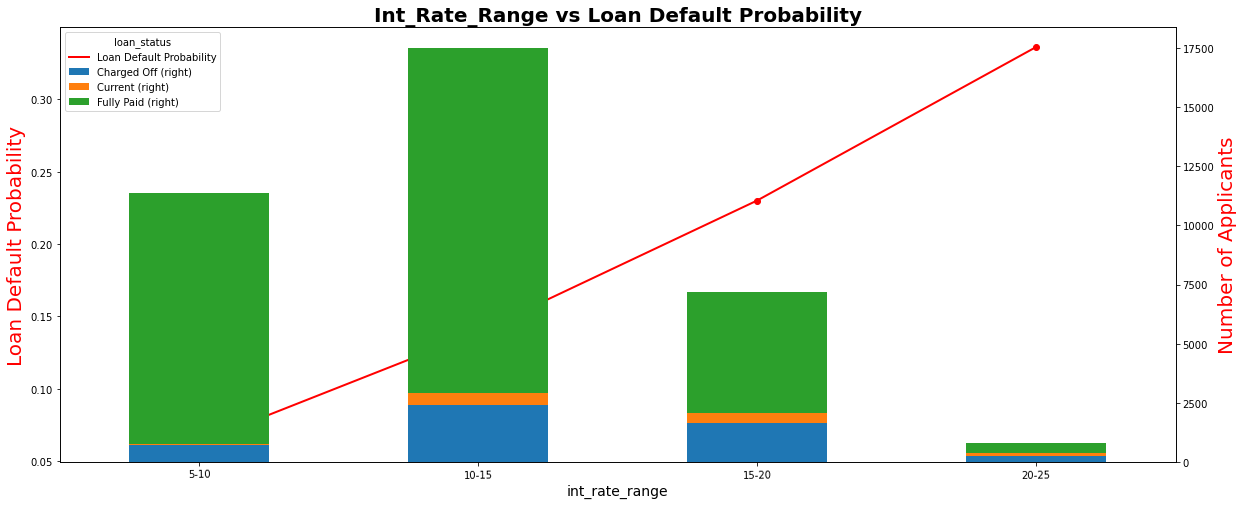

In [36]:
plot_bar_line_chart(loandf,"int_rate_range",stacked=True)

### Observation
We can see that , as interest rate is increasing , chance of being defaulter is also increasing , when the interest rate touches more than 15% , risk of default rate is increasing

### Loan Amount ( Approved Amount ) and chance of being defaulter

loan_status        Charged Off  Current  Fully Paid    All  \
funded_amnt_range                                            
0-5000                    1349       90        8298   9737   
5000-10000                1480      143       10476  12099   
10000-15000                967      299        6260   7526   
15000-20000                669      243        3086   3998   
20000-25000                379      159        1751   2289   
25000 and above            218      128         864   1210   

loan_status        Loan Default Probability  
funded_amnt_range                            
0-5000                                0.139  
5000-10000                            0.122  
10000-15000                           0.128  
15000-20000                           0.167  
20000-25000                           0.166  
25000 and above                       0.180

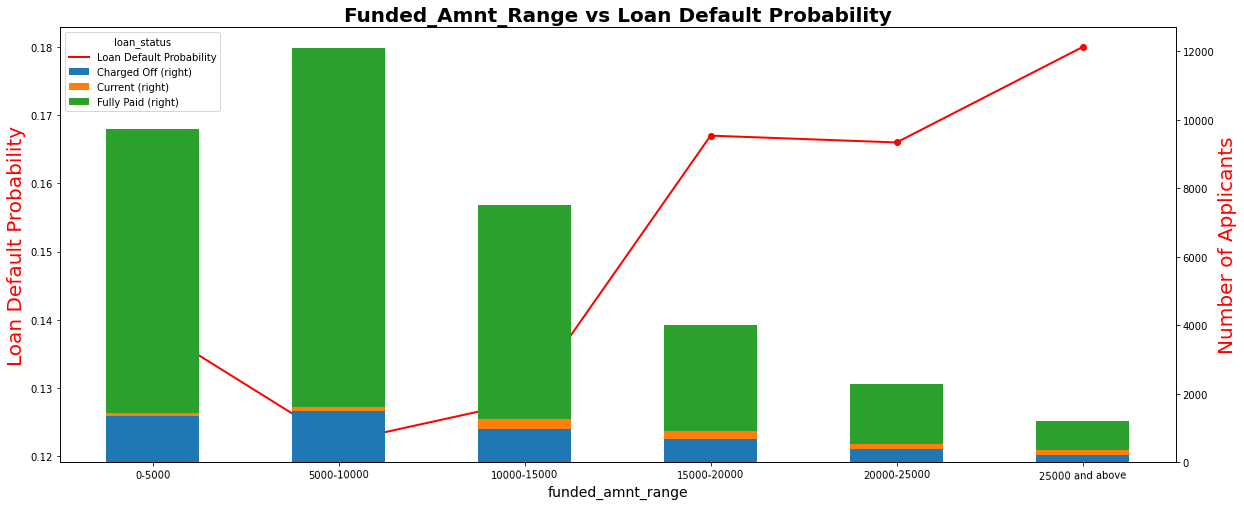

In [37]:
plot_bar_line_chart(loandf,"funded_amnt_range",stacked=True)

### Observation :-
We can see that default rate is increasing , when the loan amount/funded amount is increasing at the alarming rate 

## Case Study Conclusion

##### 1. Defaulter rate is higher when employee length are 1 year, 7 years, and >=10 years.
##### 2. Minimum defaulter rate exist for 9 years employee length.
##### 3. Maximum defaulter rate for emp length >=10 years.
##### 4. Grade is propotonal to Loan Defaulter Probability.
##### 5. We can see that , most of the loan default probablity is seen for small_business,so bank should be extra careful while approving the loan for such businesses
##### 6. Minimum defaulter rate showing for Major Purchase purpose.
##### 7. We can see, as annual income is @[proportional to] probability  of being defaulter.It is reaching up to 19%
##### 8. We can see that as interest rate is increasing chance of being defaulter is also increased. when the interest rate touches more than 15% , risk of default rate is increasing
##### 9. We can see that default rate is increasing , when the loan amount/funded amount is increasing at the alarming rate 